In [5]:
#Car Price Prediction:  ML Regression Models


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

Life cycle of Machine learning Project
1. Understanding the problem statement
1. Data Collection
1. Exploratory Data Analysis
1. Data Cleaning
1. Data Pre-Processing
1. Model Training

**Problem Statement**
A automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specificall they want to understand the factors affecting the pricing of cars  the Amerian market,  The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.




In [7]:
df = pd.read_csv('/content/car_price_prediction.csv')

In [8]:
df.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [9]:
df.tail(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


In [10]:
df.info()
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [11]:
#descriptive summary of the dataset

In [12]:
df.describe()


,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [13]:
df.shape

(19237, 18)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


In [15]:
#check the columns

In [16]:
df.columns


Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [19]:
df.isnull().sum()



ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [20]:
## There are 240 rows are duplicated here
df[df.duplicated()]


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
425,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
1581,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
1697,45732125,18503,-,TOYOTA,Prius,2010,Sedan,No,Petrol,1.8,162000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
1972,45507765,20385,-,MERCEDES-BENZ,CLS 500,2005,Sedan,Yes,Petrol,5,230000 km,8.0,Tiptronic,Rear,04-May,Left wheel,Silver,10
2131,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,45815465,2352,1273,LEXUS,IS 350,2015,Sedan,Yes,Petrol,3.5,80856 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19137,45810466,15125,642,CHEVROLET,Orlando,2012,Jeep,Yes,Diesel,2,156834 km,4.0,Automatic,Front,04-May,Left wheel,Golden,4
19200,45725908,36065,640,MERCEDES-BENZ,CLA 250 AMG,2013,Sedan,Yes,Petrol,2.0 Turbo,68000 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,12
19203,45761487,13485,645,TOYOTA,Prius,2011,Sedan,No,Hybrid,1.8,281600 km,6.0,Automatic,Front,04-May,Left wheel,Grey,8


In [21]:
df.duplicated().sum()


313

In [22]:
#Removing the duplicate records


In [23]:
df.drop_duplicates(inplace=True)


In [24]:
df.shape

(18924, 18)

In [25]:
#Check the corelations

In [26]:
df.corr()


,ID,Price,Prod. year,Cylinders,Airbags
ID,1.000000,-0.000797,0.072030,-0.040617,-0.022070
Price,-0.000797,1.000000,0.012689,0.007435,-0.012709
Prod. year,0.072030,0.012689,1.000000,-0.099443,0.235160
Cylinders,-0.040617,0.007435,-0.099443,1.000000,0.174112
Airbags,-0.022070,-0.012709,0.235160,0.174112,1.000000


<Axes: >

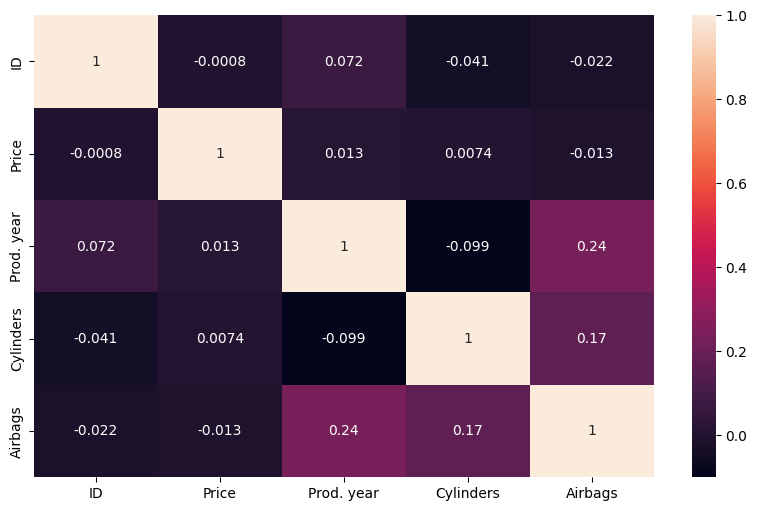

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

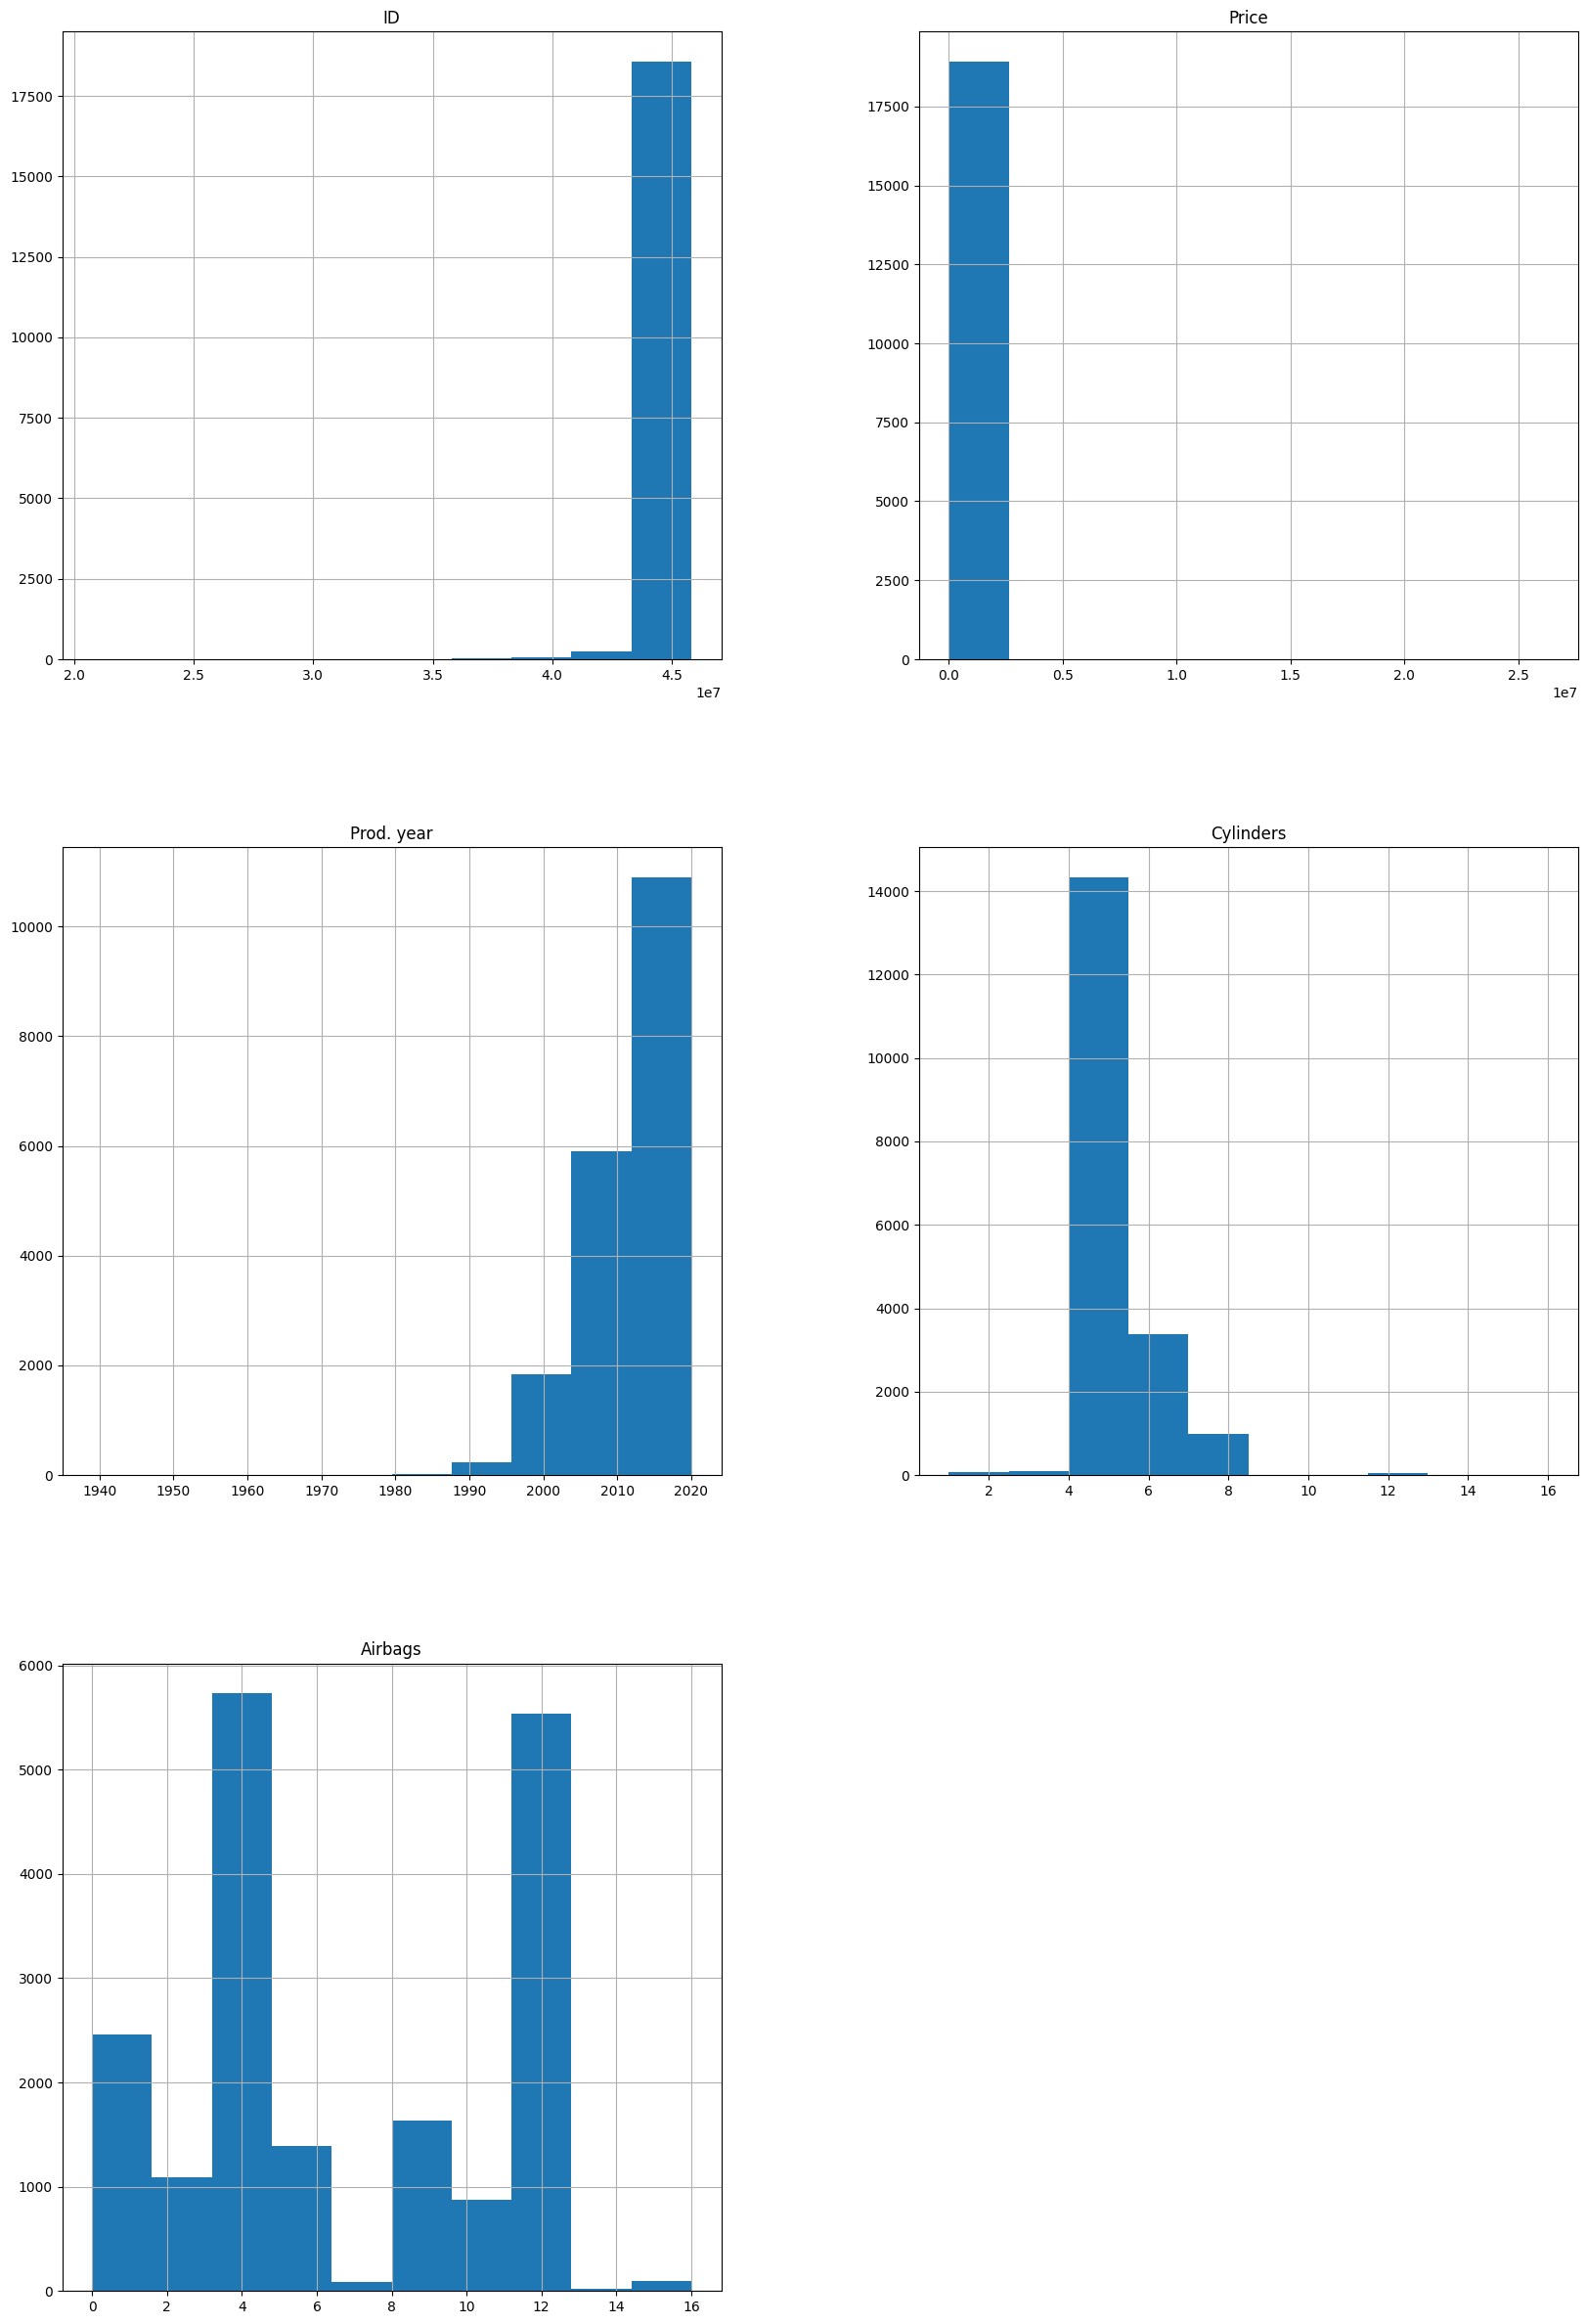

In [32]:
df.hist(figsize=(20,30));

In [33]:
#Bargraph

Text(0.5, 1.0, '# of colors')

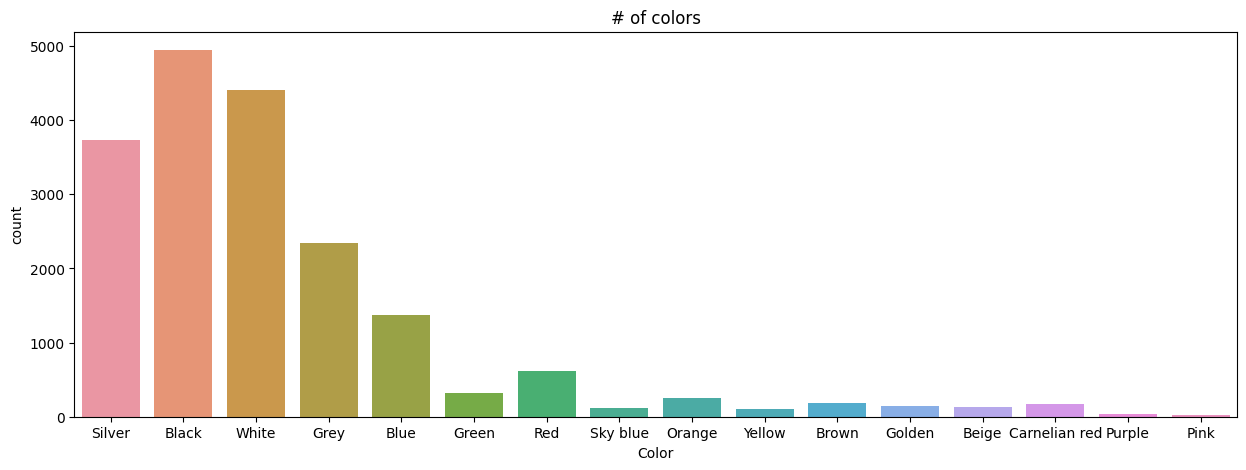

In [34]:
plt.figure(figsize=(15,5), dpi=100)
sns.countplot(data=df, x='Color')
plt.title("# of colors")

In [35]:
#Most types of Categories are Sedan, Hatchback, and Jeep.

<Axes: xlabel='Airbags', ylabel='Density'>

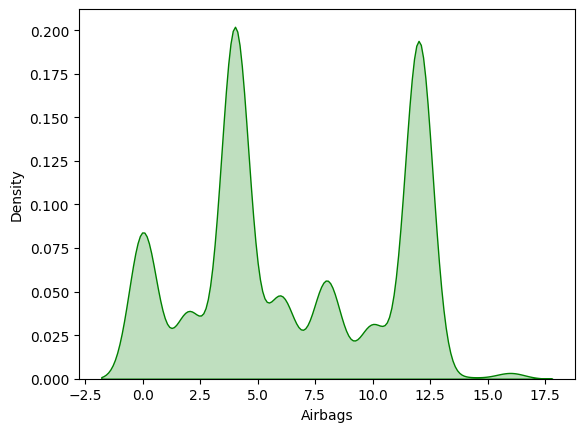

In [40]:
sns.kdeplot(df['Airbags'], color='g', shade=True)

<Axes: xlabel='Prod. year', ylabel='Count'>

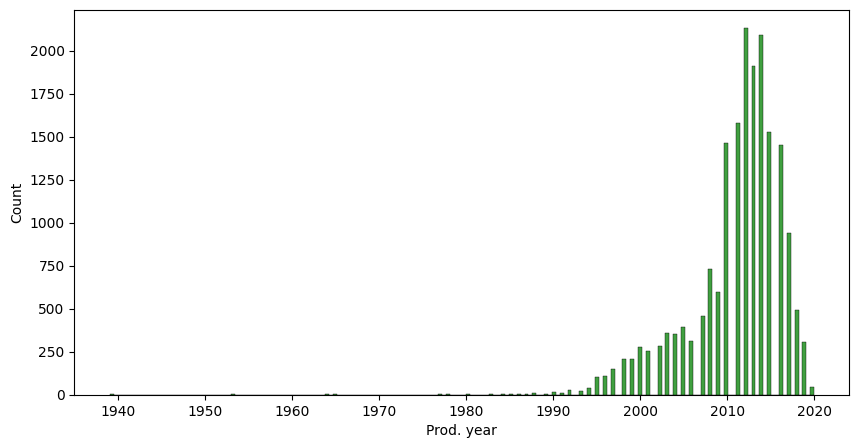

In [42]:
plt.figure(figsize=(10,5), dpi=100)
sns.histplot(df['Prod. year'],color='g')

<Axes: xlabel='Doors', ylabel='count'>

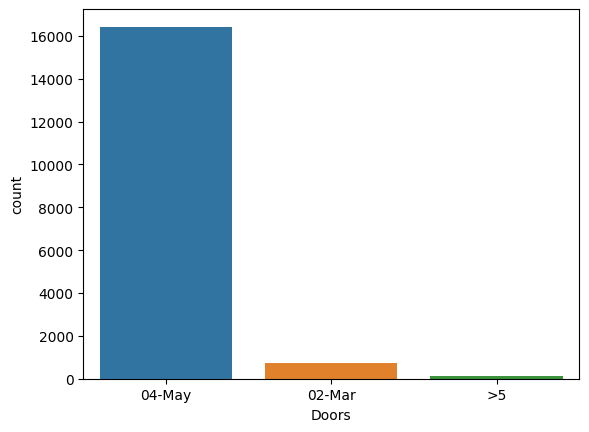

In [58]:
sns.countplot(data=df, x='Doors')

In [59]:
df['ID'].duplicated().sum()

0

In [60]:
df['Levy'].value_counts()

-       5345
765      471
891      447
639      395
640      366
        ... 
3156       1
2908       1
1719       1
4283       1
1045       1
Name: Levy, Length: 545, dtype: int64

In [61]:
df['Mileage'].value_counts()

0 km         591
200000 km    165
150000 km    131
160000 km    116
180000 km    109
            ... 
315994 km      1
61573 km       1
127105 km      1
133016 km      1
140607 km      1
Name: Mileage, Length: 7257, dtype: int64

In [62]:
df['Engine volume'].value_counts()

2            3648
2.5          2023
1.8          1555
1.6          1397
1.5          1174
             ... 
6.8             1
6.7             1
0.2 Turbo       1
0.5             1
1.1 Turbo       1
Name: Engine volume, Length: 107, dtype: int64

In [63]:
#Engine volume column mixed between object and numerical
df['Doors'].value_counts()

04-May    16425
02-Mar      749
>5          115
Name: Doors, dtype: int64

In [64]:
#Data preprocessing

In [65]:
df.drop('ID', axis=1, inplace=True)
df['Levy']= pd.to_numeric(df['Levy'], errors='coerce')

In [66]:
#Fix Levy column, convert all non numirical values to nan

df['Mileage'] = [float(value.split(' ')[0]) for value in df['Mileage']]
#Fix Mileage column, get numerical values only

df['Engine volume'] = [float(value.split(' ')[0]) for value in df['Engine volume']]
#Fix Engine volume column, get numerical values only

df['Doors'].replace({'02-Mar': '2-3', '04-May': '4-5'}, inplace=True)

Exploring Data Analysis

<Axes: xlabel='Levy', ylabel='Density'>

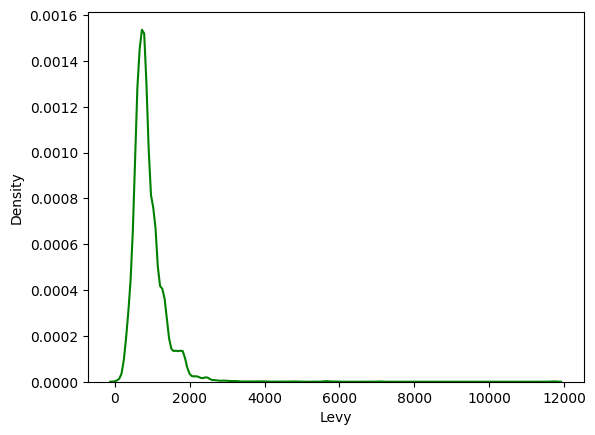

In [68]:
sns.kdeplot(df['Levy'], color='g')

Text(0.5, 1.0, '# of each Category')

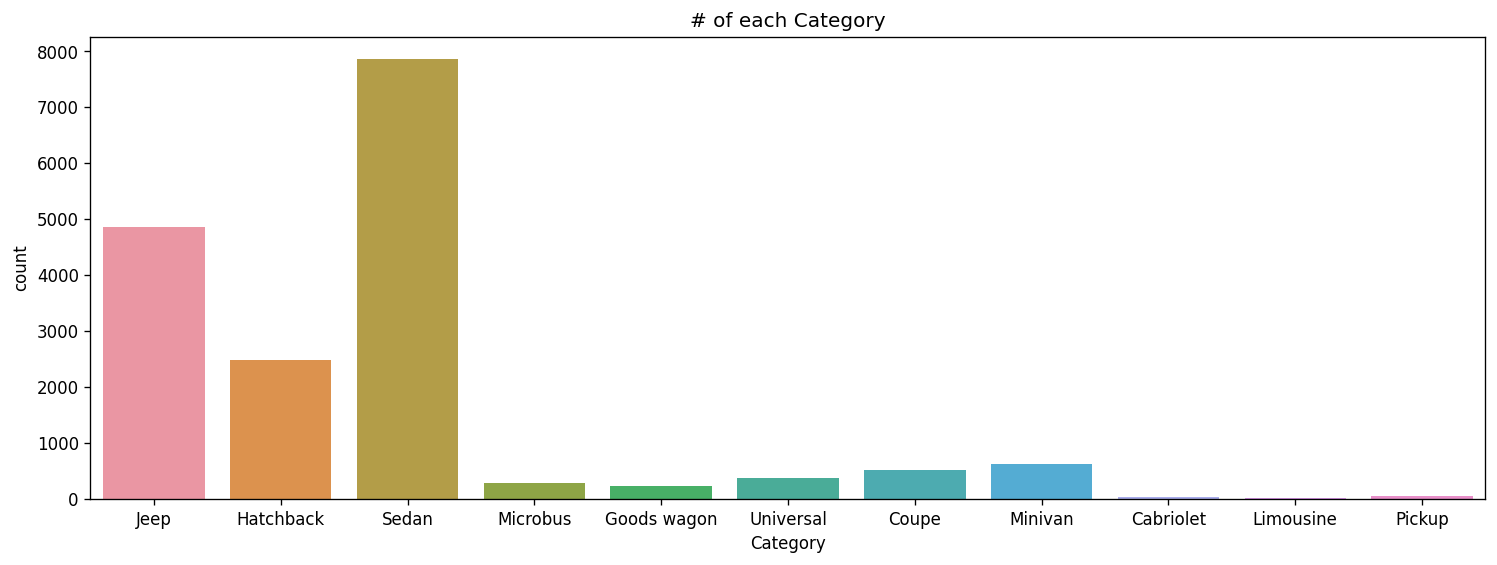

In [69]:
plt.subplots(figsize=(15,5), dpi=120)
sns.countplot(data= df, x='Category')
plt.title("# of each Category")

<Axes: xlabel='Airbags', ylabel='Density'>

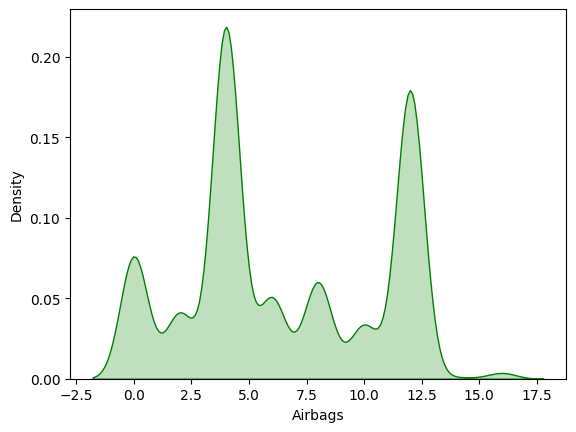

In [72]:
#Most types of Categories are Sedan, Hatchback, and Jeep.

sns.kdeplot(df['Airbags'], color='g', shade=True)

<Axes: xlabel='Mileage', ylabel='Density'>

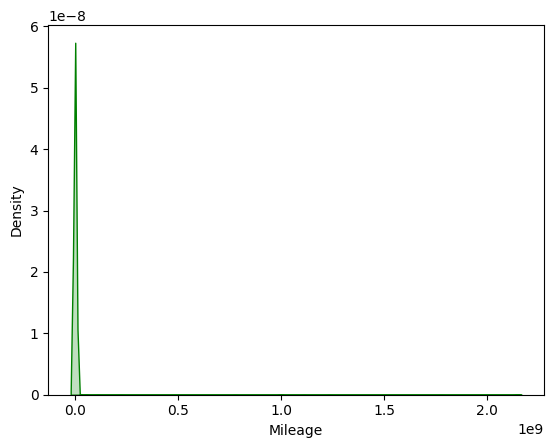

In [75]:
#Most cars have 3 to 5 airbags or 13 airbags

sns.kdeplot(df['Mileage'], color='g', shade=True)

<Axes: xlabel='Prod. year', ylabel='Count'>

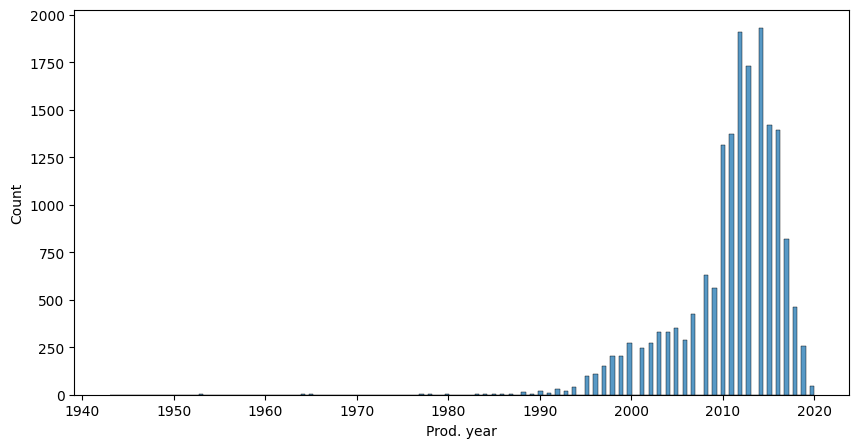

In [77]:
plt.figure(figsize=(10,5), dpi=100)
sns.histplot(df['Prod. year'])

<Axes: xlabel='Engine volume', ylabel='Density'>

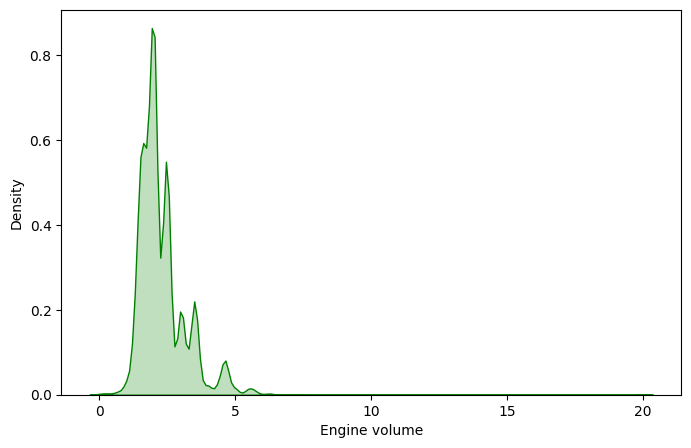

In [81]:
#Most cars are between (2010 - 2020), but we have some very old cars

plt.figure(figsize=(8,5), dpi=100)
sns.kdeplot(df['Engine volume'],color='g', shade = True)

<Axes: xlabel='Price', ylabel='Levy'>

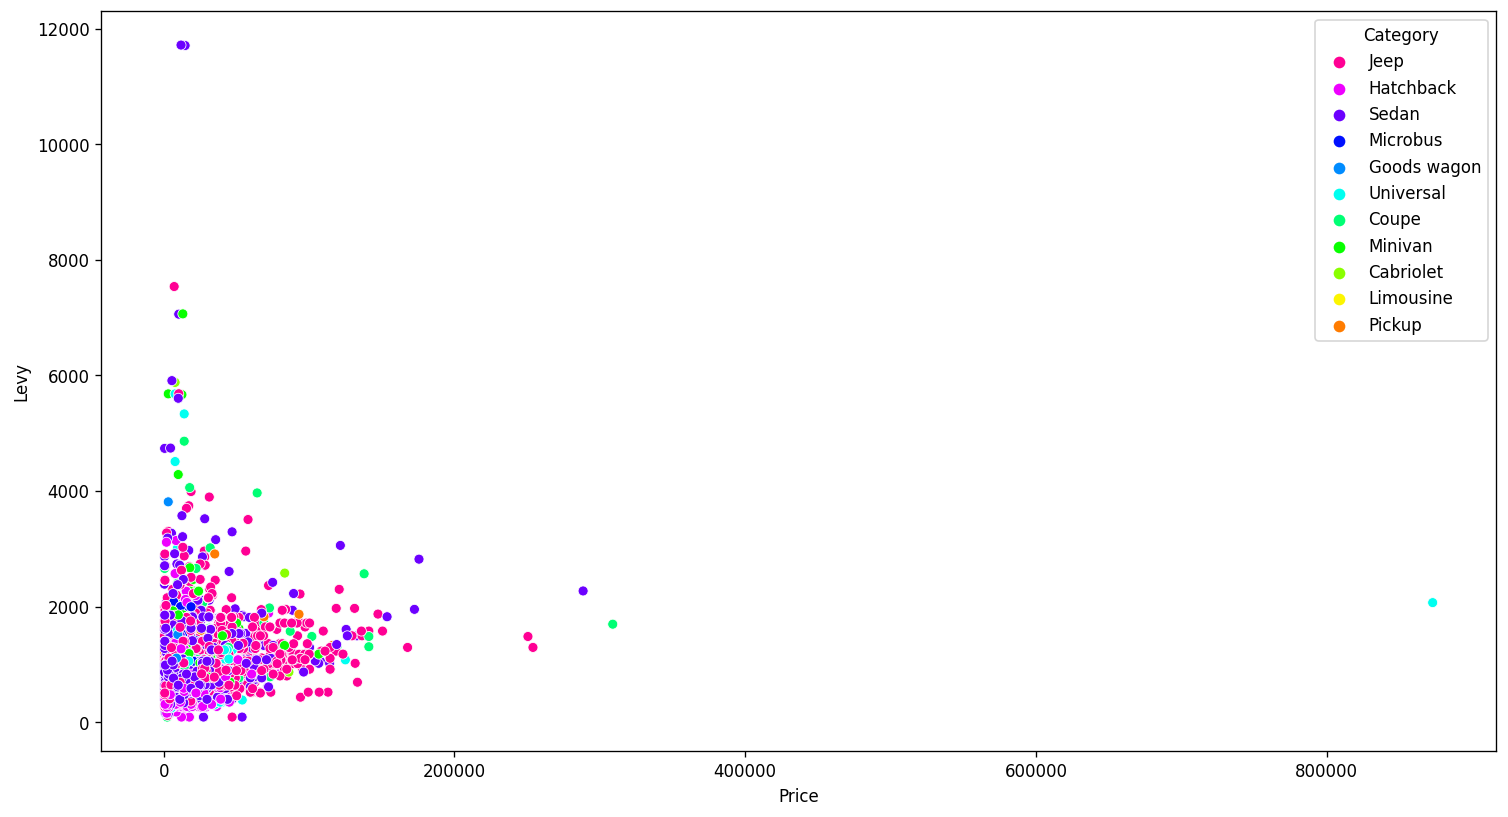

In [82]:
#Most cars in the category 3-4

plt.figure(figsize=(15, 8), dpi=120)
sns.scatterplot(data=df, x='Price', y='Levy', hue="Category", palette="hsv_r")

Jeep cars are expensive, while Hatchback and Microbus are not expensive, Universal is not expensive but has a high levy. We can notice there are unlogic plots like high price with low levy and low price with a very high levy that an outliers

<Axes: xlabel='Price', ylabel='Levy'>

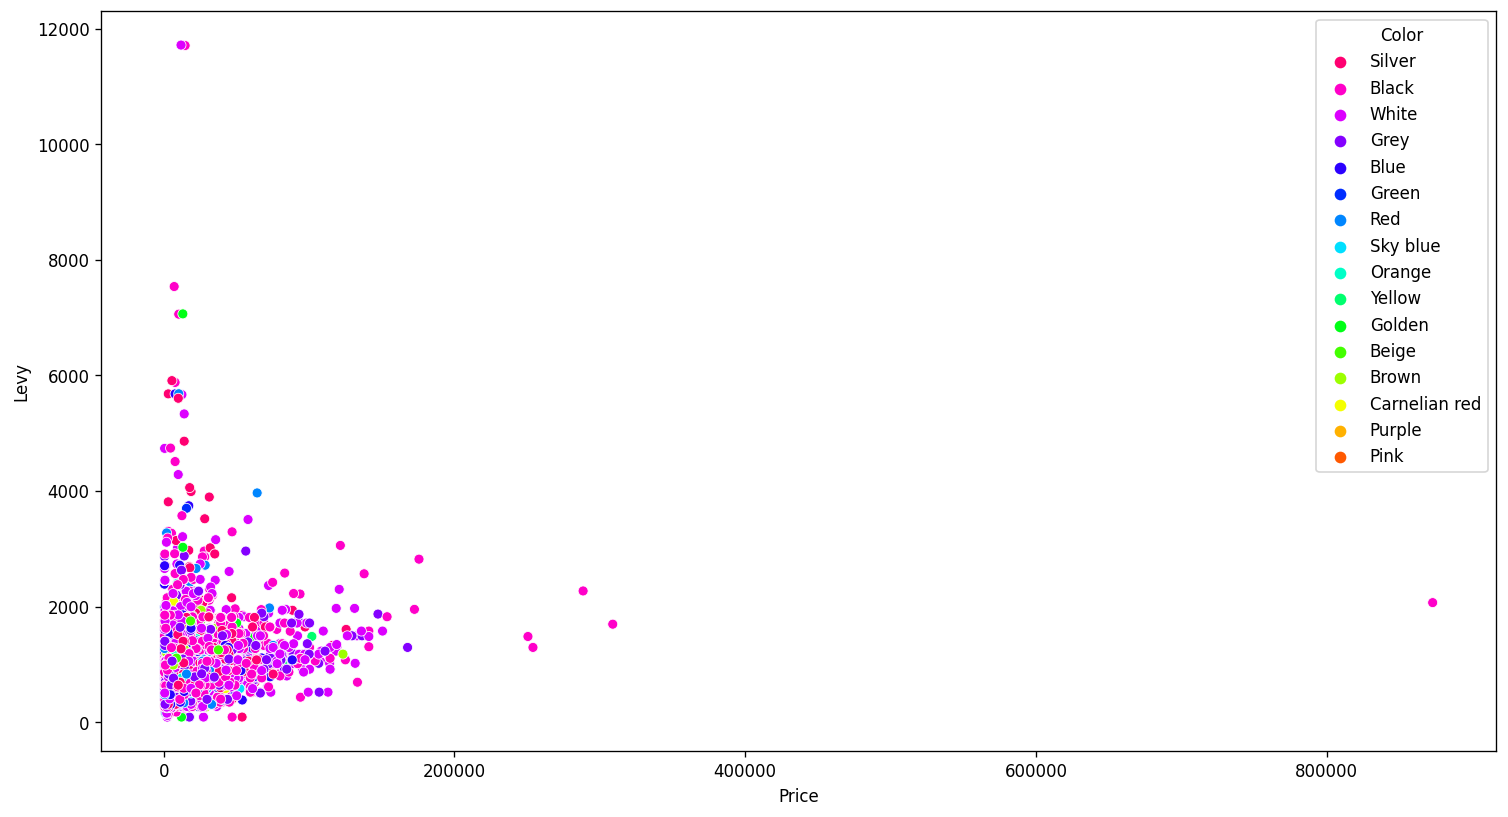

In [83]:
plt.figure(figsize=(15, 8), dpi=120)
sns.scatterplot(data=df, x='Price', y='Levy', hue="Color", palette="hsv_r")

In [84]:
df.drop_duplicates(inplace=True)

In [85]:
#Drop dublicates

df = df[df['Price'] > 500]
#we have unlogic price values becaouse w have new cars with price less than 500 so we ignored this values

df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,14799.0,2.153406e+04,2.170679e+05,549.0,8500.0,15367.0,24123.0,2.630750e+07
Levy,9461.0,8.763433e+02,4.591725e+02,87.0,640.0,779.0,1017.0,1.171400e+04
Prod. year,14799.0,2.010491e+03,5.954657e+00,1943.0,2008.0,2012.0,2014.0,2.020000e+03
Engine volume,14799.0,2.207203e+00,7.982323e-01,0.0,1.7,2.0,2.5,2.000000e+01
Mileage,14799.0,1.720727e+06,5.148377e+07,0.0,66895.5,120345.0,180000.0,2.147484e+09
Cylinders,14799.0,4.471789e+00,1.127318e+00,1.0,4.0,4.0,4.0,1.600000e+01
Airbags,14799.0,6.448206e+00,3.997651e+00,0.0,4.0,5.0,10.0,1.600000e+01


<Axes: xlabel='Levy', ylabel='Density'>

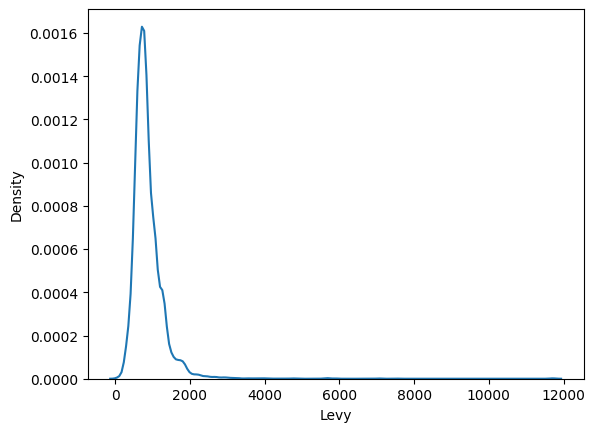

In [87]:
sns.kdeplot(df['Levy'])

<Axes: xlabel='Levy', ylabel='Density'>

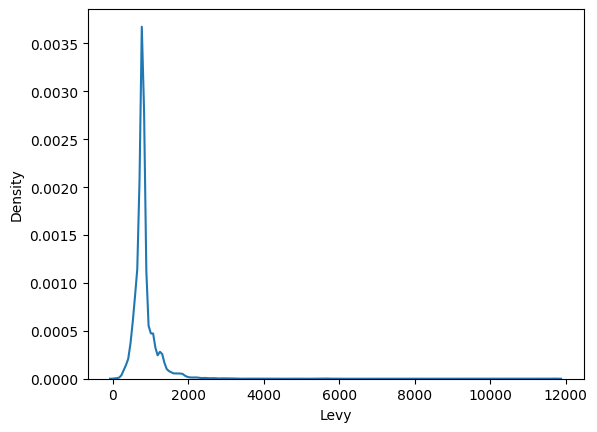

In [88]:
df['Levy'].fillna(df['Levy'].median(), inplace=True)
sns.kdeplot(df['Levy'])

In [89]:
# Handling outliers by replace it by lower and upper bounds
def handling_outliers(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        for i in range(df.shape[0]):
            if data[col][i] < lower_bound:
                data[col][i] = lower_bound
            elif data[col][i] > upper_bound:
                data[col][i] = upper_bound
            else:
                continue
    return data


# Get Continus Columns
def get_continus_columns(data):
    obj = list(data.select_dtypes('object').columns)
    lst = list(data.columns)
    for col in obj:
        lst.remove(col)
    return lst
df_with_outliers = df.copy()
df = handling_outliers(df, get_continus_columns(df))

Build ML Modul

In [93]:
x = df.drop(['Price'], axis=1).values
y = df['Price'].values

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)

In [106]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.6 MB/s eta 0:00:00


In [107]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

In [111]:
df_with_outliers = df.copy()
df = handling_outliers(df, get_continus_columns(df))

In [112]:
for col in df.select_dtypes('object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [113]:
x = df.drop(['Price'], axis=1).values
y = df['Price'].values
x = MinMaxScaler().fit_transform(x)

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)

In [115]:
lr  = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=8)
dt  = DecisionTreeRegressor(max_depth = 5)
rf  = RandomForestRegressor(n_estimators=100, max_features= 7)
ada = AdaBoostRegressor( n_estimators=150, learning_rate =.08)
gbr = GradientBoostingRegressor(max_depth=7, n_estimators=500, learning_rate =.05)
xgb = XGBRegressor(max_depth = 7, n_estimators=500, learning_rate =.05)
cb  = CatBoostRegressor(learning_rate =.07, max_depth =7, verbose=0)

regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr),('XGBRegressor', xgb),('CatBoostRegressor', cb)]

Linear Regression : 38 %
K Nearest Neighbours : 63 %
Decision Tree : 49 %
Random Forest : 77 %
AdaBoost : 45 %
Gradient Boosting Regressor : 78 %
XGBRegressor : 78 %
CatBoostRegressor : 79 %


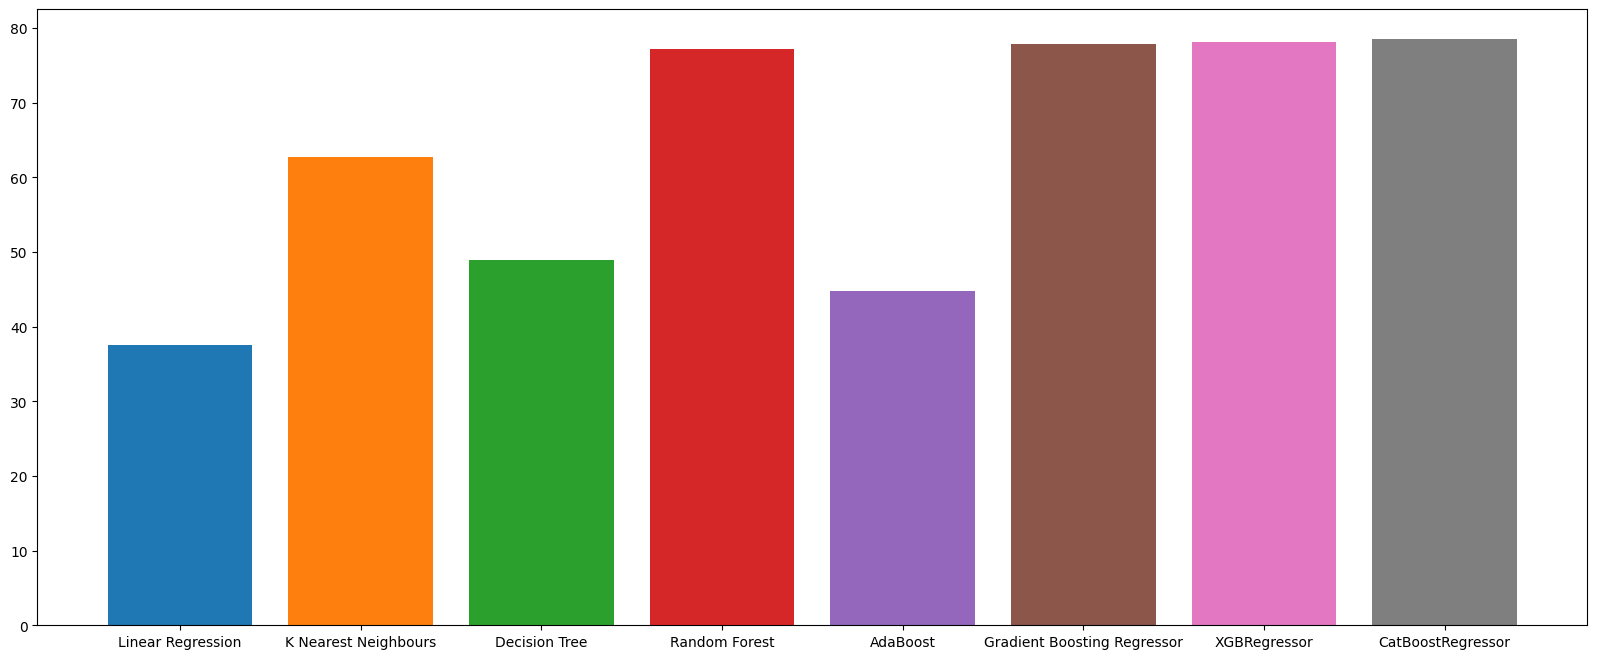

In [116]:
for regressor_name, regressor in regressors:

    regressor.fit(x_train, y_train)    
  
    y_pred = regressor.predict(x_test)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)

In [117]:
#The CatBoostRegressor model has the best accurecy (79%) without polynomial

Linear Regression : 57 %
K Nearest Neighbours : 63 %
Decision Tree : 52 %
Random Forest : 76 %
AdaBoost : 51 %
Gradient Boosting Regressor : 78 %
XGBRegressor : 78 %
CatBoostRegressor : 79 %


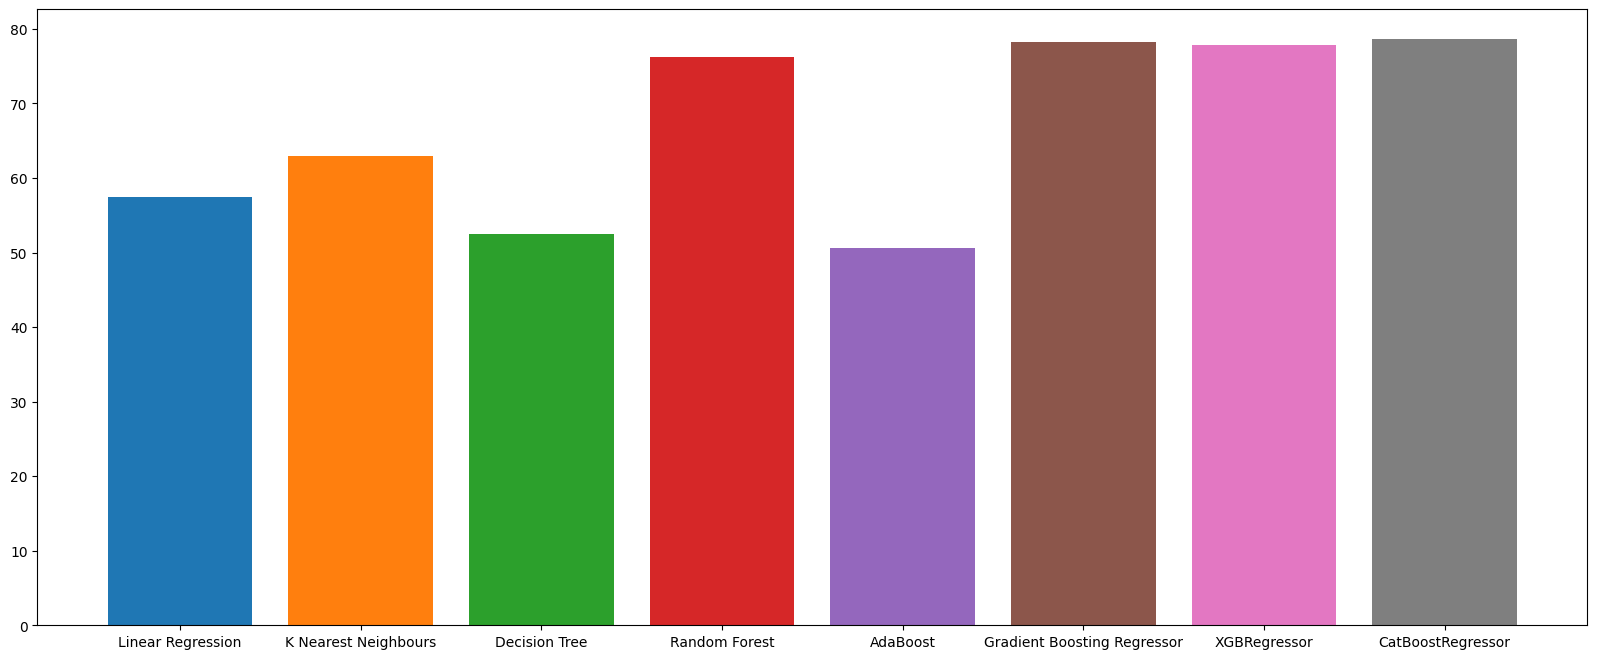

In [118]:
poly = PolynomialFeatures(degree=2)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)
for regressor_name, regressor in regressors:

    regressor.fit(x_train_trans, y_train)    
  
    y_pred = regressor.predict(x_test_trans)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)

**Conclusion**
I have tested machine learning algorith I got accuracy is give below
Linear Regression : 57 % K Nearest Neighbours : 63 % Decision Tree : 52 % Random Forest : 76 % AdaBoost : 51 % Gradient Boosting Regressor : 78 % XGBRegressor : 78 % CatBoostRegressor : 79 %

Using polynomial affect on some models but The CatBoostRegressor model has the 
best accurecy (79%)
